# **Análise de retenção**


## **Descrição do problema**

#### Baseado nos dados da Pesquisa Etensiva do Desenvolvimento Educacional PEDE 2022, identificamos o termo "evasão" como a diferença entre o número de estudantes de uma dada idade em um ano, e o número de estudantes veteranos dessa mesma idade +1 ano no ano seguinte.

#### Segundo os elaboradores da pesquisa, os dados apresentados indicam que existe uma rotatividade na Associação, que se expressa por meio de uma taxa de evasão média de 28,5% entre 2020 e 2022. Abaixo, é possível ver o gráfico de frequência da evasão entre 2021 e 2022

## **Objetivo da Análise**

#### Fazer uma análise do perfil dos alunos que evadiram, entender características que potencialmente tem mais correlação com essa prática e identificar quais outros alunos podem evadir, para que a Passos Mágicos consiga direcionar ações mais específicas para reter por mais tempo esses alunos ao longo do tempo.

## **Ajuste da base**

#### Para essa análise, vamos ajustar a base para identificarmos no geral, qual feature tem maior importância, dada o churn ano a ano:



In [129]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [130]:
df = pd.read_csv('../data/raw/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

In [131]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


## **ANÁLISE EXPLORATÓRIA**

#### A primeira forma de identificar os alunos que evadiram é entender quais features temos na base.

#### Verificamos que existem dois campos, "ponto_virada" que pode nos trazer essa informação, visto que existe durante os 3 anos de dados existentes.



### Identificando alunos que evadiram

In [132]:
indicacao_evasao = ['NOME', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']
df_evasao = df[indicacao_evasao]

df_evasao.head()

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-1,Não,Não,NaN
1,ALUNO-2,NaN,NaN,Não
2,ALUNO-3,Não,Não,NaN
3,ALUNO-4,Não,NaN,Não
4,ALUNO-5,Não,Não,Não


In [133]:
# Verificando quais alunos evadiram
def verifica_evadidos(row):
    if pd.isna(row['PONTO_VIRADA_2022']):  # Se PONTO_VIRADA_2022 for NaN
        return True  # O aluno evadiu
    elif pd.isna(row['PONTO_VIRADA_2020']):  # Se PONTO_VIRADA_2020 for NaN
        return False  # O aluno não evadiu
    elif pd.isna(row['PONTO_VIRADA_2021']):  # Se PONTO_VIRADA_2021 for NaN
        return True  # O aluno evadiu
    else:
        return False  # O aluno não evadiu

In [134]:
df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)

df_evasao.head(20)

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU
0,ALUNO-1,Não,Não,NaN,True
1,ALUNO-2,NaN,NaN,Não,False
2,ALUNO-3,Não,Não,NaN,True
3,ALUNO-4,Não,NaN,Não,True
4,ALUNO-5,Não,Não,Não,False
5,ALUNO-6,NaN,NaN,Não,False
6,ALUNO-7,NaN,NaN,Não,False
7,ALUNO-8,Sim,Não,Não,False
8,ALUNO-9,NaN,NaN,Não,False
9,ALUNO-10,Não,NaN,NaN,True


In [135]:
# Função para identificar o último ano de ponto de virada antes de NaN
def ultimo_ano(row):
    if row['EVADIU']:  # Verifica se EVADIU é verdadeiro
        if row['PONTO_VIRADA_2020'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2021']):
            return 2020
        elif row['PONTO_VIRADA_2021'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2022']):
            return 2021
        elif row['PONTO_VIRADA_2022'] in ['Sim', 'Não']:
            return 2022
    return pd.NA

In [136]:
# Aplicar a função para cada linha do DataFrame
df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)

df_evasao.head(20)

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU,ULTIMO_ANO
0,ALUNO-1,Não,Não,NaN,True,2021
1,ALUNO-2,NaN,NaN,Não,False,<NA>
2,ALUNO-3,Não,Não,NaN,True,2021
3,ALUNO-4,Não,NaN,Não,True,2020
4,ALUNO-5,Não,Não,Não,False,<NA>
5,ALUNO-6,NaN,NaN,Não,False,<NA>
6,ALUNO-7,NaN,NaN,Não,False,<NA>
7,ALUNO-8,Sim,Não,Não,False,<NA>
8,ALUNO-9,NaN,NaN,Não,False,<NA>
9,ALUNO-10,Não,NaN,NaN,True,2020


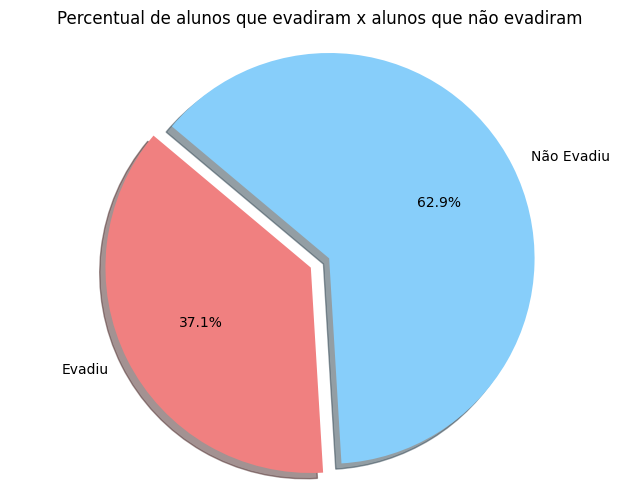

In [137]:
# Contando o número de alunos que evadiram e não evadiram
evadiu_count = df_evasao['EVADIU'].sum()
nao_evadiu_count = len(df_evasao) - evadiu_count

# Criando os rótulos e os valores para o gráfico de pizza
labels = ['Evadiu', 'Não Evadiu']
sizes = [evadiu_count, nao_evadiu_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Criando o gráfico de setores
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentual de alunos que evadiram x alunos que não evadiram')
plt.axis('equal')
plt.show()

### **Estudo sobre os alunos evadidos**

#### Agora que identificamos quais alunos evadiram, vamos agrupá-los e fazer uma análise exploratória

In [138]:
# Mesclar os DataFrames com base na coluna 'NOME'
df = df.merge(df_evasao[['NOME', 'EVADIU', 'ULTIMO_ANO']], on='NOME', how='left')

# Visualizar o DataFrame combinado
df

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,EVADIU,ULTIMO_ANO
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2021
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),False,<NA>
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2021
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),True,2020
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),False,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,NaN,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2021
1345,NaN,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano),False,<NA>
1346,Escola Pública,ALUNO-1347,17,1,7B,Não,7.158543333333334,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2020
1347,Escola Pública,ALUNO-1348,13,2,3R,Sim,7.842224333333333,B,Ametista,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.833328,5.0,Fase 5 (1º EM),False,<NA>


In [139]:
cols = ['INDE_2020',  'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
         'INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021',
         'INDE_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022']
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [140]:
# removendo linha problematica
df = df.loc[~(df['INDE_2020'] == 'D980')]

In [141]:
df.loc[(df['INDE_2021'] == '#NULO!'),['INDE_2021']] = np.nan

In [142]:
for col in cols:
    print('-='*20)
    print(col)
    df.loc[:, [col]] = df[col].astype(float)
    print(df.groupby('EVADIU')[col].describe())

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
INDE_2020
        count  unique       top  freq
EVADIU                               
False   314.0   314.0  8.077085   1.0
True    413.0   413.0  7.883752   1.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAA_2020
        count  unique      top  freq
EVADIU                              
False   314.0    35.0  9.00002  71.0
True    413.0    35.0  9.00002  52.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IEG_2020
        count  unique   top  freq
EVADIU                           
False   314.0    58.0  10.0  41.0
True    413.0    84.0  10.0  46.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IPS_2020
        count  unique  top   freq
EVADIU                           
False   314.0    13.0  7.5  166.0
True    413.0    13.0  7.5  230.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IDA_2020
        count  unique   top  freq
EVADIU                           
False   314.0    44.0  10.0  44.0
True    413.0    67.0   0.0  59.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [143]:
from sklearn.preprocessing import MinMaxScaler
# normalizar
# scaler = MinMaxScaler()

df = df[cols + ['EVADIU','ULTIMO_ANO','NOME']]
# df[cols] = scaler.fit_transform(df[cols])

df = df.melt(id_vars=['EVADIU','ULTIMO_ANO','NOME'])

df['var_year'] = [x.split('_')[1] for x in df['variable']]
df['variable'] = [x.split('_')[0] for x in df['variable']]
df['EVADIU'] = [(str(getattr(x, 'ULTIMO_ANO')) == str(getattr(x, 'var_year'))) if not(getattr(x, 'ULTIMO_ANO') is pd.NA) else False for x in df.itertuples()]
df = df.drop(columns=['ULTIMO_ANO'])
df

,EVADIU,NOME,variable,value,var_year
0,False,ALUNO-1,INDE,7.883752,2020
1,False,ALUNO-2,INDE,NaN,2020
2,False,ALUNO-3,INDE,7.85639,2020
3,True,ALUNO-4,INDE,5.076252,2020
4,False,ALUNO-5,INDE,8.077085,2020
...,...,...,...,...,...
32347,False,ALUNO-1345,IAN,NaN,2022
32348,False,ALUNO-1346,IAN,5.0,2022
32349,False,ALUNO-1347,IAN,NaN,2022
32350,False,ALUNO-1348,IAN,5.0,2022


In [144]:
df = df.pivot_table(columns=['variable'], index=['EVADIU','var_year','NOME']).reset_index()
df

EVADIU var_year        NOME    value                                  \
variable                                  IAA   IAN       IDA   IEG      INDE   
0         False     2020     ALUNO-1  8.50002  10.0       7.0   8.7  7.883752   
1         False     2020   ALUNO-100  9.00002   5.0       7.5   6.5  6.908335   
2         False     2020  ALUNO-1002  9.16668   5.0  8.333333   9.4  8.114724   
3         False     2020  ALUNO-1004  9.00002  10.0       9.0  10.0  7.675002   
4         False     2020  ALUNO-1007  9.50002  10.0       4.0   8.3  7.526669   
...         ...      ...         ...      ...   ...       ...   ...       ...   
2270       True     2021   ALUNO-973      6.3   5.0       2.7   7.9     5.933   
2271       True     2021   ALUNO-977      9.0   5.0       5.4   7.1     6.249   
2272       True     2021   ALUNO-986      8.8   5.0       6.3   6.4     6.427   
2273       True     2021   ALUNO-987      9.0  10.0       6.1   8.3     7.965   
2274       True     2021   ALUNO-999      7.9  10.0       6.4   6.1     6.858   

                                     
variable       IPP    IPS       IPV  
0           5.9375    7.5      7.75  
1            6.875  4.375  7.916665  
2            8.125    7.5  7.944447  
3              2.5   6.25       5.5  
4         8.333333    7.5   7.66667  
...            ...    ...       ...  
2270           6.9    6.3       6.8  
2271           5.8    7.5       5.1  
2272           8.3    1.9       7.5  
2273           7.2    7.5       8.6  
2274           6.9    4.4       7.2  

[2275 rows x 11 columns]

## análise das variáveis envolvidas

In [145]:
df.columns = ['EVADIU','YEAR','NOME','IAA','IAN','IDA','IEG','INDE','IPP','IPS','IPV']
cols = ['YEAR','IAA','IAN','IDA','IEG','INDE','IPP','IPS','IPV']

df

,EVADIU,YEAR,NOME,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV
0,False,2020,ALUNO-1,8.50002,10.0,7.0,8.7,7.883752,5.9375,7.5,7.75
1,False,2020,ALUNO-100,9.00002,5.0,7.5,6.5,6.908335,6.875,4.375,7.916665
2,False,2020,ALUNO-1002,9.16668,5.0,8.333333,9.4,8.114724,8.125,7.5,7.944447
3,False,2020,ALUNO-1004,9.00002,10.0,9.0,10.0,7.675002,2.5,6.25,5.5
4,False,2020,ALUNO-1007,9.50002,10.0,4.0,8.3,7.526669,8.333333,7.5,7.66667
...,...,...,...,...,...,...,...,...,...,...,...
2270,True,2021,ALUNO-973,6.3,5.0,2.7,7.9,5.933,6.9,6.3,6.8
2271,True,2021,ALUNO-977,9.0,5.0,5.4,7.1,6.249,5.8,7.5,5.1
2272,True,2021,ALUNO-986,8.8,5.0,6.3,6.4,6.427,8.3,1.9,7.5
2273,True,2021,ALUNO-987,9.0,10.0,6.1,8.3,7.965,7.2,7.5,8.6


## Ajustar dado em Y-1 e Y

In [146]:
df.YEAR.value_counts()

YEAR
2022    862
2020    727
2021    686
Name: count, dtype: int64

In [147]:
df_2020 = df.loc[df.YEAR=='2020']
df_2021 = df.loc[df.YEAR=='2021']
df_2022 = df.loc[df.YEAR=='2022']
base_columns = ['NOME', 'IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP',
       'IPS', 'IPV']

In [148]:
df_2021.columns

Index(['EVADIU', 'YEAR', 'NOME', 'IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP',
       'IPS', 'IPV'],
      dtype='object')

In [149]:
df_2020_2021 = df_2020[base_columns]\
        .rename(columns={ 'IAA':'IAA_Y-1'
                        , 'IAN':'IAN_Y-1'
                        , 'IDA':'IDA_Y-1'
                        , 'IEG':'IEG_Y-1'
                        , 'INDE':'INDE_Y-1'
                        , 'IPP':'IPP_Y-1'
                        , 'IPS':'IPS_Y-1'
                        , 'IPV':'IPV_Y-1'
                        })\
        .merge(df_2021[base_columns + ['EVADIU']]\
               .rename(columns={  'IAA':'IAA_Y'
                                , 'IAN':'IAN_Y'
                                , 'IDA':'IDA_Y'
                                , 'IEG':'IEG_Y'
                                , 'INDE':'INDE_Y'
                                , 'IPP':'IPP_Y'
                                , 'IPS':'IPS_Y'
                                , 'IPV':'IPV_Y'
                                })
                , on='NOME', how='right')

df_2021_2022 = df_2021[base_columns]\
        .rename(columns={ 'IAA':'IAA_Y-1'
                        , 'IAN':'IAN_Y-1'
                        , 'IDA':'IDA_Y-1'
                        , 'IEG':'IEG_Y-1'
                        , 'INDE':'INDE_Y-1'
                        , 'IPP':'IPP_Y-1'
                        , 'IPS':'IPS_Y-1'
                        , 'IPV':'IPV_Y-1'
                        })\
        .merge(df_2022[base_columns + ['EVADIU']]\
               .rename(columns={  'IAA':'IAA_Y'
                                , 'IAN':'IAN_Y'
                                , 'IDA':'IDA_Y'
                                , 'IEG':'IEG_Y'
                                , 'INDE':'INDE_Y'
                                , 'IPP':'IPP_Y'
                                , 'IPS':'IPS_Y'
                                , 'IPV':'IPV_Y'
                                })
                , on='NOME', how='right')
df_geral = pd.concat([df_2020_2021, df_2021_2022])

cols = list(set(df_geral.columns) - set(['NOME', 'EVADIU']))
df = df_geral

# Modelo preditivo

In [150]:
import joblib, os
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    precision_recall_fscore_support,
)


def _get_xgb_model(path='models/xgb_model.pkl'):
    return joblib.load(path)

def _run_xgboost(df_final, path='models/xgb_model.pkl', predict=False, retrain=False):
    X, y = df_final.drop(columns=['EVADIU','NOME']), df_final['EVADIU']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    if not(retrain):
        if (os.path.isfile(path)) and not(predict):
            predict_pipeline = _get_xgb_model(path)
            return {
            'pipeline':predict_pipeline
            , 'precision':str(round(precision_score(y_test, predict_pipeline.predict(X_test))*100,2))+"%"
            , 'recall':str(round(recall_score(y_test, predict_pipeline.predict(X_test))*100,2))+"%"
            , 'predictions':predict_pipeline.predict(df_final.drop(columns=['EVADIU','NOME']))
            }
        
        if (os.path.isfile(path)) and (predict):
            predict_pipeline = _get_xgb_model(path)
            return {
            'pipeline':predict_pipeline
            , 'precision':str(round(precision_score(df_final['EVADIU'], predict_pipeline.predict(df_final.drop(columns=['EVADIU','NOME'])))*100,2))+"%"
            , 'recall':str(round(recall_score(df_final['EVADIU'], predict_pipeline.predict(df_final.drop(columns=['EVADIU','NOME'])))*100,2))+"%"
            , 'predictions':predict_pipeline.predict(df_final.drop(columns=['EVADIU','NOME']))
            }

    numeric_features = list(set(X.columns) - set(['Year']))
    numeric_transformer = Pipeline(
        steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler())]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features)
        ]
    )

    predict_pipeline = Pipeline(
        steps=[("preprocessor", preprocessor), ("model", GradientBoostingClassifier(random_state=42))]
    )

    # https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

    predict_pipeline.fit(X_train, y_train)
    joblib.dump(predict_pipeline, path)
    return {
          'pipeline':predict_pipeline
        , 'precision':str(round(precision_score(y_test, predict_pipeline.predict(X_test))*100,2))+"%"
        , 'recall':str(round(recall_score(y_test, predict_pipeline.predict(X_test))*100,2))+"%"
        , 'predictions':predict_pipeline.predict(df_final.drop(columns=['EVADIU','NOME']))
        }

# BorutaShap´
vamos tentar os shapley values:


In [151]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [152]:
response = _run_xgboost(df, path='../models/xgb_model_forfeatures.pkl', retrain=True)

In [162]:
model=response['pipeline']

In [164]:
model[:-1].get_feature_names_out()

array(['num__IAA_Y', 'num__IPS_Y', 'num__IDA_Y-1', 'num__IEG_Y-1',
       'num__IPP_Y', 'num__IAA_Y-1', 'num__IDA_Y', 'num__INDE_Y-1',
       'num__IPV_Y-1', 'num__IPV_Y', 'num__IPP_Y-1', 'num__IAN_Y-1',
       'num__IEG_Y', 'num__INDE_Y', 'num__IPS_Y-1', 'num__IAN_Y'],
      dtype=object)

  0%|          | 0/50 [00:00<?, ?it/s]

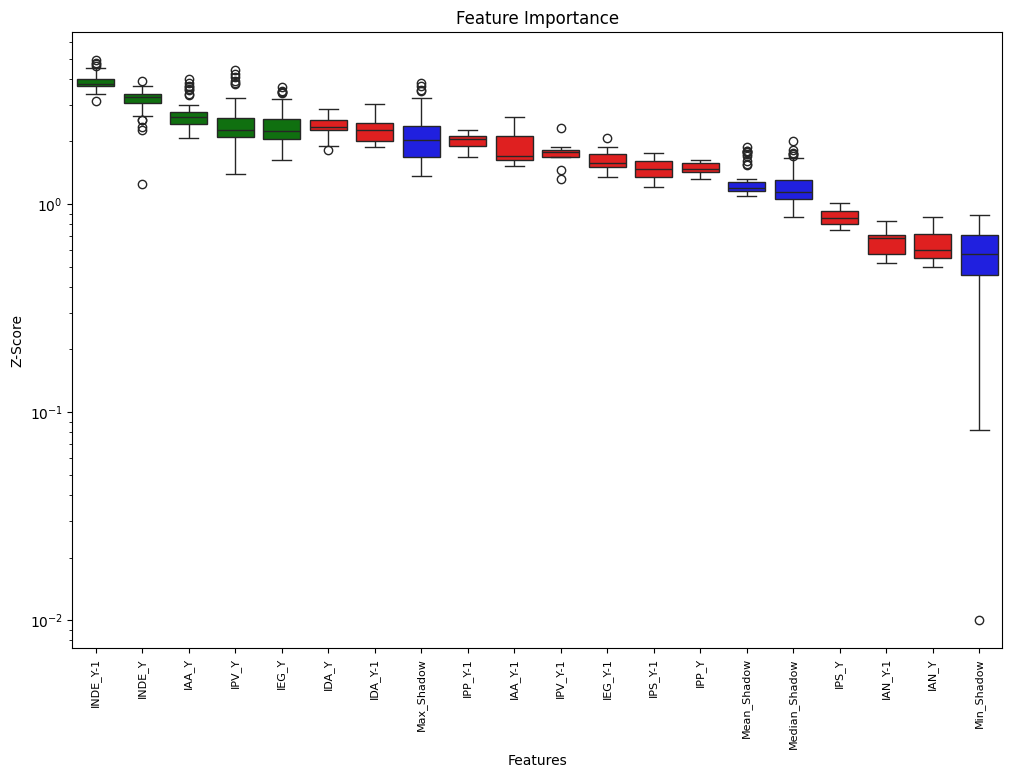

In [ ]:

rf_feature_selection = BorutaShap(
    model=response['pipeline']['model'], importance_measure="shap", classification=False, pvalue=0.1
)

rf_feature_selection.fit(
    X=X_train,
    y=y_train,
    n_trials=50,
    sample=False,
    train_or_test="train",
    normalize=True,
    verbose=False,
)

boruta_accepted = rf_feature_selection.accepted

rf_feature_selection.plot(which_features='all')

0 tentative features are now accepted: []
0 tentative features are now rejected: []


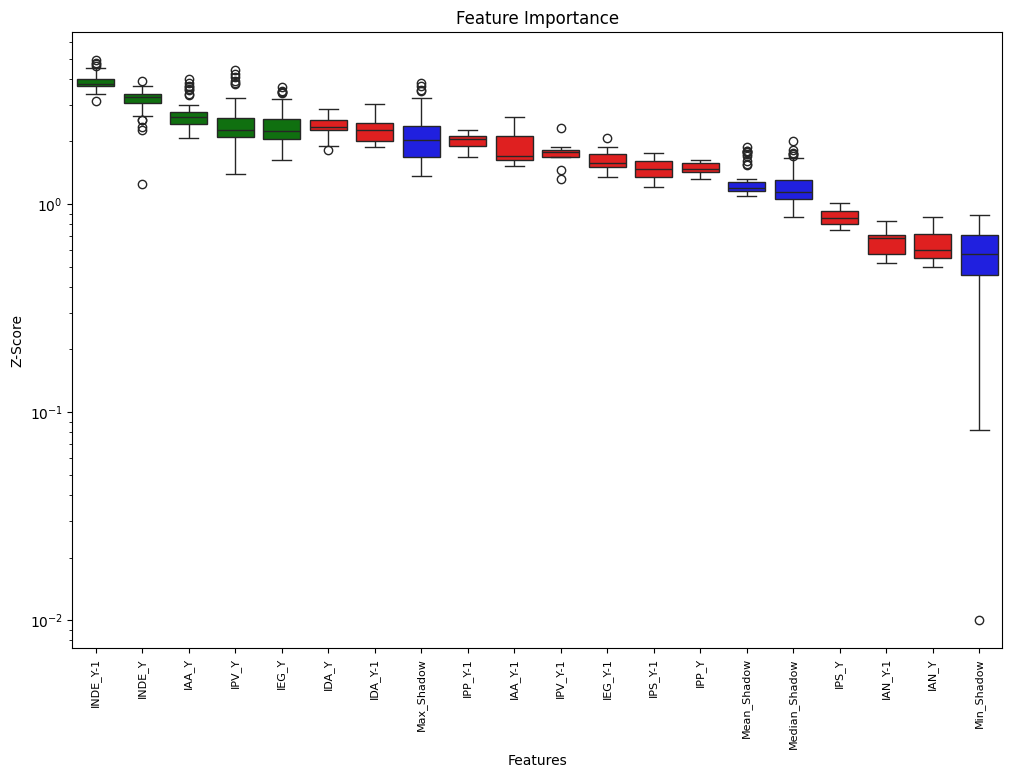

In [ ]:
# https://github.com/Ekeany/Boruta-Shap/blob/master/Examples/Classification.ipynb
rf_feature_selection.TentativeRoughFix()
rf_feature_selection.plot(which_features='all')

## shap

In [ ]:
import shap
shap.initjs()
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html#Train-the-model

X_train, X_test, y_train, y_test = train_test_split(
       df[cols], df['EVADIU'], test_size=0.2, random_state=42, shuffle=False
    )

explainer = shap.TreeExplainer(response['pipeline']['model'])
shap_values = explainer.shap_values(X_train)

shap.force_plot(
    explainer.expected_value, shap_values, X_train
)


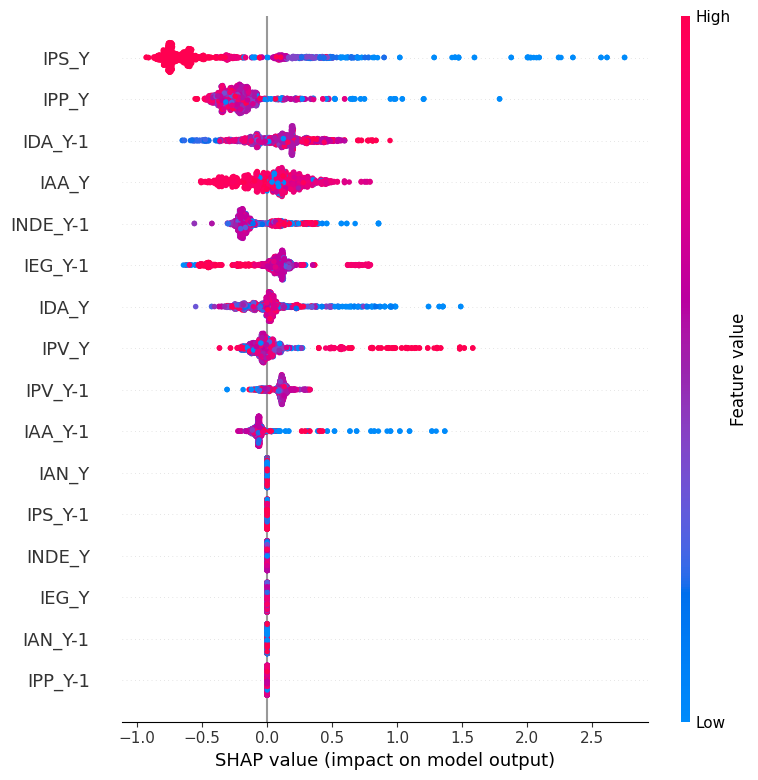

In [ ]:
fig = shap.summary_plot(shap_values, X_train)

In [ ]:
fig